In [47]:
import requests
import csv
from requests.auth import HTTPBasicAuth
#import jason

# Step 1: Get the API endpoint for issues
issues_api_endpoint = "http://localhost:9000/api/measures/search_history"

# Step 2: Query the API
parameters = {
    "component": "test_commit_analysis",
    "metrics": "code_smells",
    # 'token': 'squ_c6150ca004538957f8fd04dcea71df1ae8e63c75'
}
response = requests.get(issues_api_endpoint, auth=HTTPBasicAuth("admin", "admin_j"), params=parameters)

# Step 3: Parse the response
#data = response.json()["issues"]
response.text

# Step 4: Write the data to a CSV file
#with open("issues.csv", "w", newline="") as file:
    #writer = csv.writer(file)
    #writer.writerow(["key", "severity", "message", "line"])
    #for issue in data:
    #    writer.writerow([issue["key"], issue["severity"], issue["message"], issue["line"]])


'{"paging":{"pageIndex":1,"pageSize":100,"total":20},"measures":[{"metric":"code_smells","history":[{"date":"2023-02-16T21:11:52+1300","value":"10121"},{"date":"2023-02-17T00:05:08+1300","value":"9945"},{"date":"2023-02-17T00:10:54+1300","value":"9966"},{"date":"2023-02-17T00:16:43+1300","value":"9976"},{"date":"2023-02-17T00:22:24+1300","value":"9976"},{"date":"2023-02-17T00:28:04+1300","value":"10000"},{"date":"2023-02-17T00:33:37+1300","value":"10013"},{"date":"2023-02-17T00:39:16+1300","value":"10015"},{"date":"2023-02-17T00:45:27+1300","value":"10020"},{"date":"2023-02-17T00:51:37+1300","value":"10029"},{"date":"2023-02-17T00:57:10+1300","value":"10034"},{"date":"2023-02-17T01:03:11+1300","value":"10055"},{"date":"2023-02-17T01:08:44+1300","value":"10087"},{"date":"2023-02-17T01:15:23+1300","value":"10071"},{"date":"2023-02-17T01:22:18+1300","value":"10060"},{"date":"2023-02-17T01:28:20+1300","value":"10120"},{"date":"2023-02-17T01:34:20+1300","value":"10108"},{"date":"2023-02-17T

In [46]:
issues_api_endpoint = "http://localhost:9000/api/measures/component"

# Step 2: Query the API
parameters = {
    "component": "test_commit_analysis",
    # "component": "apache_hadoop_common_sq_analysis",
    "metricKeys": "code_smells",
    # 'token': 'squ_c6150ca004538957f8fd04dcea71df1ae8e63c75'
}
response = requests.get(issues_api_endpoint, auth=HTTPBasicAuth("admin", "admin_j"), params=parameters)

# Step 3: Parse the response
#data = response.json()["issues"]
response.text

'{"component":{"key":"test_commit_analysis","name":"test_commit_analysis","qualifier":"TRK","measures":[{"metric":"code_smells","value":"10121","bestValue":false}]}}'

In [48]:
issues_api_endpoint = "http://localhost:9000/api/components/search"

# Step 2: Query the API
parameters = {
    # "component": "test_commit_analysis",
    # "component": "apache_hadoop_common_sq_analysis",
    # "metricKeys": "code_smells",
    # 'token': 'squ_c6150ca004538957f8fd04dcea71df1ae8e63c75'
}
response = requests.get(issues_api_endpoint, auth=HTTPBasicAuth("admin", "admin_j"), params=parameters)

# Step 3: Parse the response
#data = response.json()["issues"]
response.text


'{"errors":[{"msg":"The \\u0027qualifiers\\u0027 parameter is missing"}]}'

In [28]:
os.popen('curl -u admin:admin_j http://localhost:9000/api/metrics/search').read()

'{"metrics":[{"id":"AYYQBpDwZX2IAd_TXxyp","key":"new_technical_debt","type":"WORK_DUR","name":"Added Technical Debt","description":"Added technical debt","domain":"Maintainability","direction":-1,"qualitative":true,"hidden":false},{"id":"AYYQBpDzZX2IAd_TXxzI","key":"analysis_from_sonarqube_9_4","type":"BOOL","name":"Analysis From SonarQube 9.4","description":"Indicates whether the analysis has been run after the upgrade to SonarQube 9.4. It affects how the issues will be detected for branches that use reference branch as the strategy for detecting new code.","domain":"Issues","direction":0,"qualitative":false,"hidden":true},{"id":"AYYQBpDuZX2IAd_TXxyQ","key":"blocker_violations","type":"INT","name":"Blocker Issues","description":"Blocker issues","domain":"Issues","direction":-1,"qualitative":true,"hidden":false},{"id":"AYYQBpDwZX2IAd_TXxyi","key":"bugs","type":"INT","name":"Bugs","description":"Bugs","domain":"Reliability","direction":-1,"qualitative":false,"hidden":false},{"id":"AYYQB

In [29]:
import os 
# response = os.popen('curl -u admin:admin_j http://localhost:9000/api/issues/search').read()
response = os.popen('curl -u admin:admin_j http://localhost:9000/api/measures/component?component=apache_hadoop_common_sq_analysis&metricKeys=code_smells').read()
import json
json_data = json.loads(response)

json_data.keys()
# sq_issues = json_data['issues']

# sq_issues[0].keys()

dict_keys(['errors'])

In [30]:
response = os.popen('curl -u admin:admin_j http://localhost:9000/api/measures/search_history?component=apache_hadoop_common_sq_analysis&metrics=_main').read()
import json
json_data = json.loads(response)


In [31]:
json_data

{'errors': [{'msg': "The 'metrics' parameter is missing"}]}

In [32]:
%pip install sonar-tools

import sonar_tools as st

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'sonar_tools'

In [21]:
# !export SONAR_HOST_URL=http://localhost:9000
# !export SONAR_TOKEN=sqp_321c45681c2b87c2cbdb13c3de9e22e971c1b985

# Exports LoCs, nbr of bugs and number of vulnerabilities of all projects main branch
# sonar-measures-export -m ncloc,bugs,vulnerabilities >measures.csv
!sonar-measures-export -m code_smells -k test_commit_analysis -f my-project-measures.csv --format csv --withURL -t squ_c6150ca004538957f8fd04dcea71df1ae8e63c75


2023-02-17 10:55:56,250 | sonar-tools | INFO    | MainThread      | Set debug level to INFO
2023-02-17 10:55:56,251 | sonar-tools | INFO    | MainThread      | sonar-tools version 2.6
2023-02-17 10:55:56,553 | sonar-tools | INFO    | MainThread      | Getting measures for project 'test_commit_analysis'
2023-02-17 10:55:56,587 | sonar-tools | INFO    | MainThread      | Computing LoCs
2023-02-17 10:55:56,602 | sonar-tools | INFO    | MainThread      | 1 PROJECTS 1 branches 1262508 LoCs


In [9]:
!sonar-measures-export --help

usage: sonar-measures-export [-h] [-t TOKEN] [-u URL] [-v {WARN,INFO,DEBUG}]
                             [-c CLIENTCERT] [-k PROJECTKEYS] [-f FILE]
                             [--format {csv,json}]
                             [--csvSeparator CSVSEPARATOR] [-m METRICKEYS]
                             [-b] [--withTags] [-r] [-p] [-d] [--withURL]

Extract measures of projects

options:
  -h, --help            show this help message and exit
  -t TOKEN, --token TOKEN
                        Token to authenticate to the source SonarQube, default
                        is environment variable $SONAR_TOKEN - Unauthenticated
                        usage is not possible
  -u URL, --url URL     Root URL of the source SonarQube server, default is
                        environment variable $SONAR_HOST_URL or
                        http://localhost:9000 if not set
  -v {WARN,INFO,DEBUG}, --verbosity {WARN,INFO,DEBUG}
                        Logging verbosity level
  -c CLIENTCERT, --clientC

In [4]:
import requests
import csv
from requests.auth import HTTPBasicAuth
#import jason

# Step 1: Get the API endpoint for issues
issues_api_endpoint = "http://localhost:9000/api/measures/search_history"

# Step 2: Query the API
parameters = {
    "component": "apache_hadoop_common_sq_analysis",
    "metrics": "code_smells",
    # 'token': 'squ_c6150ca004538957f8fd04dcea71df1ae8e63c75'
}
response = requests.get(issues_api_endpoint, auth=HTTPBasicAuth("admin", "admin_j"), params=parameters)

# Step 3: Parse the response
import json
json_data = json.loads(response.text)
json_data.keys()

#response.text
#'{"paging":{"pageIndex":1,"pageSize":100,"total":20},"measures":[{"metric":"code_smells","history":[{"date":"2023-02-16T21:11:52+1300","value":"10121"},{"date":"2023-02-17T00:05:08+1300","value":"9945"},{"date":"2023-02-17T00:10:54+1300","value":"9966"},{"date":"2023-02-17T00:16:43+1300","value":"9976"},

#sq_measures = json_data['measures']
for i in range(len(json_data["measures"][0]["history"])):
    print (json_data["measures"][0]["history"][i]["date"], json_data["measures"][0]["history"][i]["value"])
#json_data["measures"][0]["history"][0]["date"], json_data["measures"][0]["history"][0]["value"]

#sq_issues[0].keys()



2023-02-17T07:38:22+1300 9175
2023-02-17T07:48:11+1300 9169
2023-02-17T07:57:11+1300 9176
2023-02-17T08:05:40+1300 9179
2023-02-17T08:14:13+1300 9187
2023-02-17T08:22:49+1300 9204
2023-02-17T08:31:25+1300 9234
2023-02-17T08:40:07+1300 9266
2023-02-17T08:48:46+1300 9296
2023-02-17T08:57:30+1300 9312
2023-02-17T09:06:16+1300 9315
2023-02-17T09:15:10+1300 9313
2023-02-17T09:51:24+1300 9367
2023-02-17T10:02:35+1300 9349
2023-02-17T10:12:30+1300 9352
2023-02-17T10:23:33+1300 9379
2023-02-17T10:35:34+1300 9372
2023-02-17T10:46:27+1300 9945
2023-02-17T10:58:02+1300 9966
2023-02-17T11:10:02+1300 9976
2023-02-17T11:22:12+1300 9976
2023-02-17T11:34:05+1300 10000


In [5]:
import pandas as pd
new_data_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_with_jira.csv')
new_main_rows = new_data_df[new_data_df['hash'].notna()]
new_main_rows['code_smells'] = 0
for i, row in new_main_rows.iterrows():
    if i % 10 != 0:
        continue
    new_main_rows.at[i,'code_smells'] = int(json_data["measures"][0]["history"][int(i/10)]["value"])
    print (i, row['code_smells'])



0 0
10 0
20 0
30 0
40 0
50 0
60 0
70 0
80 0
90 0
100 0
110 0
120 0
130 0
140 0
150 0
160 0
170 0
180 0
190 0
200 0
210 0


IndexError: list index out of range

In [72]:
new_main_rows['code_smells']

0      9175
1         0
2         0
3         0
4         0
       ... 
354       0
355       0
356       0
357       0
358       0
Name: code_smells, Length: 359, dtype: int64

In [6]:
new_main_rows[:11]

,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,added_lines,deleted_lines,nloc,jira issue key,summary,issue type,status,resolution,code_smells
0,49df83899543586bbcaf80f01399ade031cf68b0,Steve Loughran,2020-01-09 18:22:04+00:00,Steve Loughran,2020-01-10 11:11:56+00:00,HADOOP-16697. Tune/audit S3A authoritative mod...,['9da294a140a919d9ba648637d09340bccfd5edd6'],32.0,30.0,2393.0,358.0,13520.0,HADOOP-16697,audit/tune s3a authoritative flag in s3guard D...,Sub-task,Resolved,Fixed,9175
1,c4fb43c94259546f2c96b50ceae9cd3adb726166,Daryn Sharp,2020-01-10 10:31:39-06:00,Jonathan Eagles,2020-01-10 10:31:39-06:00,HADOOP-16749. Configuration parsing of CDATA v...,['49df83899543586bbcaf80f01399ade031cf68b0'],2.0,2.0,38.0,0.0,4405.0,HADOOP-16749,Configuration parsing of CDATA values are blank,Bug,Resolved,Fixed,0
2,e589f6199c562cb1e478a38f5f2c5dee94880258,Eric Yang,2020-01-10 14:32:02-05:00,Eric Yang,2020-01-10 14:33:12-05:00,HADOOP-16590. Update OS login modules for IBM...,['5fb901ac4017b4f13b089ecd920e864cd53ad3a6'],1.0,1.0,4.0,24.0,1448.0,HADOOP-16590,IBM Java has deprecated OS login module classe...,Bug,Resolved,Fixed,0
3,5d180463dcb689fa3b7c69b097a86398a03b41ad,David Mollitor,2020-01-15 18:38:34+00:00,Steve Loughran,2020-01-15 18:38:34+00:00,HADOOP-16790. Add Write Convenience Methods.\n...,['2aa065d98f36527d7769c9c58a923a706036391d'],2.0,2.0,414.0,0.0,2317.0,HADOOP-16790,Add Write Convenience Methods,New Feature,Resolved,Fixed,0
4,edbbc03ce7d479f1b84d9209021e9d2822909cfe,Vinayakumar B,2020-01-16 23:15:50+05:18,GitHub,2020-01-16 23:15:50+05:18,HADOOP-16621. [pb-upgrade] Remove Protobuf cla...,['a0ff42d7612e744e0bf88aa14078ea3ab6bcce49'],6.0,4.0,78.0,69.0,3758.0,HADOOP-16621,[pb-upgrade] Remove Protobuf classes from sign...,Sub-task,Resolved,Fixed,0
5,1defe3a65af5faf5117978f4f2cf6a24d17a2e76,Akira Ajisaka,2020-01-21 10:58:32+09:00,Akira Ajisaka,2020-01-21 10:58:32+09:00,HADOOP-16753. Refactor HAAdmin. Contributed by...,['6a859d33aa77260a4329035066c7c63c02df0fcd'],4.0,4.0,296.0,199.0,1607.0,HADOOP-16753,Refactor HAAdmin,Improvement,Resolved,Fixed,0
6,f206b736f0b370d212a399937c7a84e432f12eb5,Sahil Takiar,2020-01-21 16:37:51+00:00,Steve Loughran,2020-01-21 16:37:51+00:00,HADOOP-16346. Stabilize S3A OpenSSL support.\n...,['d887e49dd4ed2b94bbb53b7608586f5da6cee037'],9.0,3.0,24.0,8.0,475.0,HADOOP-16346,Stabilize S3A OpenSSL support,Sub-task,Resolved,Fixed,0
7,5e2ce370a322a46b496541ccd17443197fcfeb5a,Steve Loughran,2020-01-21 22:31:51+00:00,Mingliang Liu,2020-01-21 14:31:51-08:00,HADOOP-16759. Filesystem openFile() builder to...,['0696828a090bc06446f75b29c967697f1d6d845b'],18.0,16.0,487.0,134.0,11821.0,HADOOP-16759,Filesystem openFile() builder to take a FileSt...,Sub-task,Resolved,Fixed,0
8,839e6076c1db0ed7dee32ba917a03c37ea65dc7c,Steve Loughran,2020-01-24 18:50:16+00:00,Mingliang Liu,2020-01-24 10:50:16-08:00,HADOOP-16827. TestHarFileSystem.testInheritedM...,['d10f77e3c91225f86ed9c0f0e6a9adf2e1434674'],1.0,1.0,3.0,6.0,307.0,HADOOP-16827,TestHarFileSystem.testInheritedMethodsImplemen...,Sub-task,Resolved,Fixed,0
9,1afd54fbbb858a58112e6290b3063216eea82206,belugabehr,2020-01-25 10:12:21-05:00,Ayush Saxena,2020-01-25 20:30:21+05:18,HADOOP-16811: Use JUnit TemporaryFolder Rule i...,['6d008c0d39185f18dbec4676f4d0e7ef77104eb7'],1.0,1.0,65.0,156.0,1072.0,HADOOP-16811,Use JUnit TemporaryFolder Rule in TestFileUtils,Improvement,Resolved,Fixed,0


In [ ]:
#import pandas as pd
#new_data_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_with_jira.csv')
#new_main_rows = new_data_df[new_data_df['hash'].notna()]
#new_main_rows['code_smells'] = 0

for i, row in new_main_rows.iterrows():
    if i % 10 != 0:
        continue
    new_main_rows.at[i,'code_smells'] = int(json_data["measures"][0]["history"][int(i/10)]["value"])
    print (i, row['code_smells'])



Text(0.5, 0, 'Code Smells, Total LOC, Added Lines, Deleted Lines')

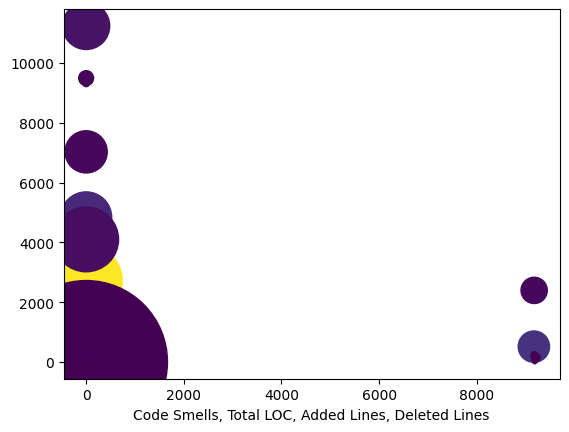

In [78]:
import matplotlib.pyplot as plt

#draw chart Issye Type vs nloc
plt.scatter(new_main_rows['code_smells'], new_main_rows['added_lines'], new_main_rows['deleted_lines'], new_main_rows['nloc'])

#add axis titles
plt.xlabel('Code Smells, Total LOC, Added Lines, Deleted Lines')
#plt.ylabel('Issue Type')

C:\Users\randi\AppData\Local\Temp\ipykernel_21480\3879891808.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_main_rows['code_smells'], ax=ax[0])
C:\Users\randi\AppData\Local\Temp\ipykernel_21480\3879891808.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_main_rows['nloc'], ax=ax[1

Text(0.5, 1.0, 'LOC')

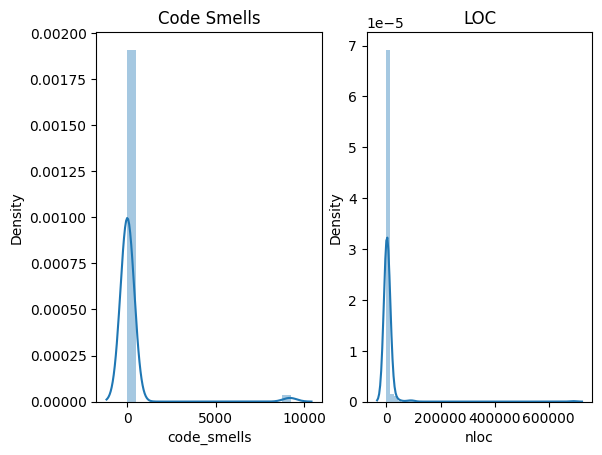

In [80]:
import seaborn as sns

fig, ax=plt.subplots(1,2)

sns.distplot(new_main_rows['code_smells'], ax=ax[0])
ax[0].set_title('Code Smells')

sns.distplot(new_main_rows['nloc'], ax=ax[1])
ax[1].set_title('LOC')

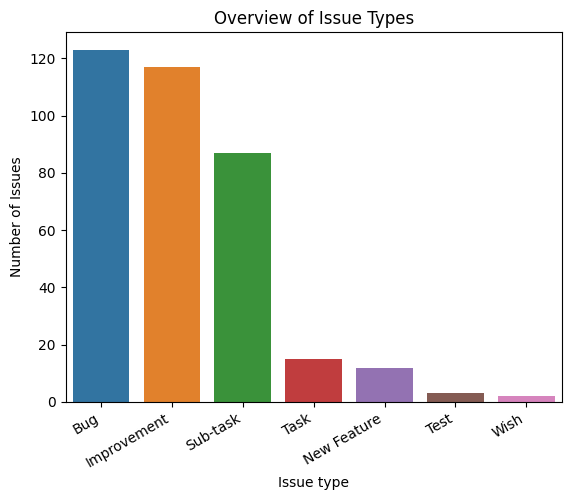

In [81]:
d = new_main_rows

ax_issue_types = sns.countplot(data=d, x='issue type', order=d['issue type'].value_counts().index)
ax_issue_types.set(xlabel='Issue type', ylabel='Number of Issues', title='Overview of Issue Types')
plt.setp(ax_issue_types.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show(ax_issue_types)

In [84]:
new_main_rows.head(1)

,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,added_lines,deleted_lines,nloc,jira issue key,summary,issue type,status,resolution,code_smells
0,49df83899543586bbcaf80f01399ade031cf68b0,Steve Loughran,2020-01-09 18:22:04+00:00,Steve Loughran,2020-01-10 11:11:56+00:00,HADOOP-16697. Tune/audit S3A authoritative mod...,['9da294a140a919d9ba648637d09340bccfd5edd6'],32.0,30.0,2393.0,358.0,13520.0,HADOOP-16697,audit/tune s3a authoritative flag in s3guard D...,Sub-task,Resolved,Fixed,9175


In [7]:
df_10th = new_main_rows.loc[new_main_rows.index % 10 == 0]



In [101]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

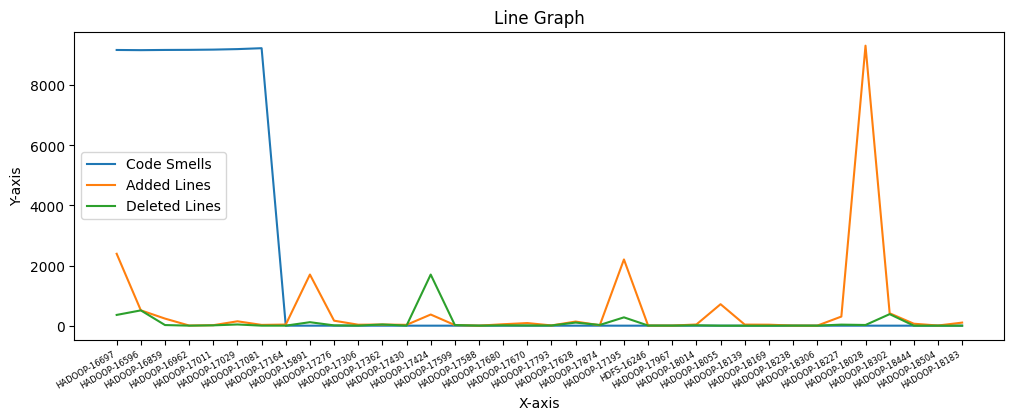

In [103]:
# import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(df_10th['jira issue key'], df_10th['code_smells'])

# ax.plot(df_10th['jira issue key'], df_10th['nloc'])

ax.plot(df_10th['jira issue key'], df_10th['added_lines'])

ax.plot(df_10th['jira issue key'], df_10th['deleted_lines'])

#add labels to lines
ax.legend(['Code Smells', 'Added Lines', 'Deleted Lines'])

#make x axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
#make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph')

# Display the graph
plt.show()


## Pearson correlation

a low p-value (typically below 0.05) suggests that the correlation is statistically significant, while a high p-value indicates that the correlation may be due to chance. 

In [ ]:
#%pip install scipy

In [106]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and its p-value
corr1, p1 = pearsonr(df_10th['code_smells'], df_10th['added_lines'])
corr2, p2 = pearsonr(df_10th['code_smells'], df_10th['deleted_lines'])

# Print the results
print(f'Pearson correlation coefficient between code smells and added lines: {corr1:.2f}, p-value: {p1:.2f}')
print(f'Pearson correlation coefficient between code smells and deleted lines: {corr2:.2f}, p-value: {p2:.2f}')


Pearson correlation coefficient between code smells and added lines: -0.02, p-value: 0.92
Pearson correlation coefficient between code smells and deleted lines: 0.05, p-value: 0.77


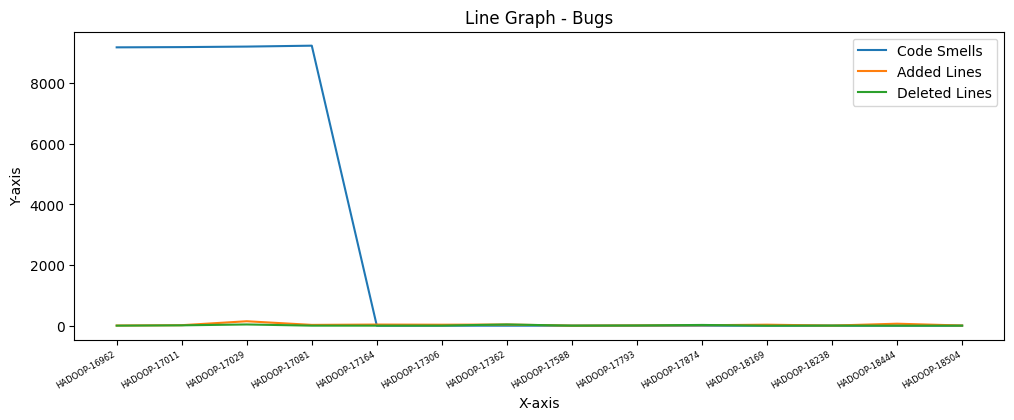

In [109]:
# import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

df_10th['jira issue key']
#filter df_10 to only inluce issue type Bug
df_10th_bug = df_10th[df_10th['issue type'] == 'Bug']

# Plot the data as a line graph
ax.plot(df_10th_bug['jira issue key'], df_10th_bug['code_smells'])

# ax.plot(df_10th['jira issue key'], df_10th['nloc'])

ax.plot(df_10th_bug['jira issue key'], df_10th_bug['added_lines'])

ax.plot(df_10th_bug['jira issue key'], df_10th_bug['deleted_lines'])

#add labels to lines
ax.legend(['Code Smells', 'Added Lines', 'Deleted Lines'])

#make x axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
#make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph - Bugs')

# Display the graph
plt.show()


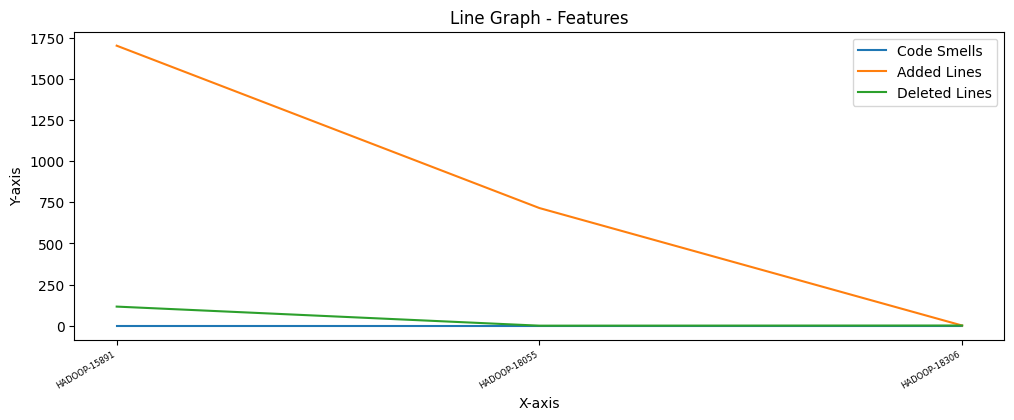

In [110]:
# import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

df_10th['jira issue key']
#filter df_10 to only inluce issue type Bug
df_10th_feature = df_10th[df_10th['issue type'] == 'New Feature']

# Plot the data as a line graph
ax.plot(df_10th_feature['jira issue key'], df_10th_feature['code_smells'])

# ax.plot(df_10th['jira issue key'], df_10th['nloc'])

ax.plot(df_10th_feature['jira issue key'], df_10th_feature['added_lines'])

ax.plot(df_10th_feature['jira issue key'], df_10th_feature['deleted_lines'])

#add labels to lines
ax.legend(['Code Smells', 'Added Lines', 'Deleted Lines'])

#make x axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
#make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph - Features')

# Display the graph
plt.show()


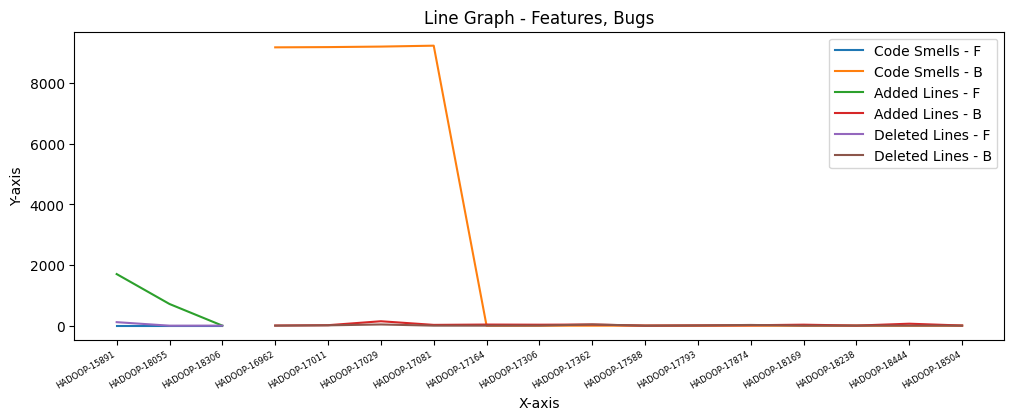

In [113]:
# import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

df_10th['jira issue key']
#filter df_10 to only inluce issue type Bug
df_10th_feature = df_10th[df_10th['issue type'] == 'New Feature']
#filter df_10 to only inluce issue type Bug
df_10th_bug = df_10th[df_10th['issue type'] == 'Bug']

# Plot the data as a line graph
ax.plot(df_10th_feature['jira issue key'], df_10th_feature['code_smells'])
ax.plot(df_10th_bug['jira issue key'], df_10th_bug['code_smells'])

# ax.plot(df_10th['jira issue key'], df_10th['nloc'])

ax.plot(df_10th_feature['jira issue key'], df_10th_feature['added_lines'])
ax.plot(df_10th_bug['jira issue key'], df_10th_bug['added_lines'])
ax.plot(df_10th_feature['jira issue key'], df_10th_feature['deleted_lines'])
ax.plot(df_10th_bug['jira issue key'], df_10th_bug['deleted_lines'])

#add labels to lines
ax.legend(['Code Smells - F', 'Code Smells - B', 'Added Lines - F', 'Added Lines - B', 'Deleted Lines - F', 'Deleted Lines - B'])

#make x axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
#make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph - Features, Bugs')

# Display the graph
plt.show()


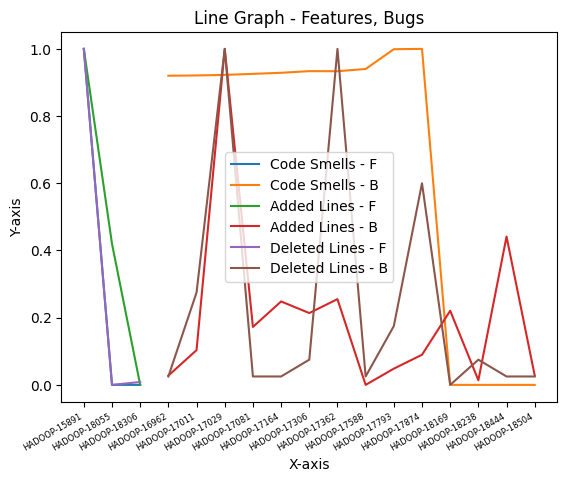

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter df_10th to only include issue type Bug and New Feature
df_10th_feature = df_10th[df_10th['issue type'] == 'New Feature']
df_10th_bug = df_10th[df_10th['issue type'] == 'Bug']

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

feature_code_Smells = min_max_scaling(df_10th_feature['code_smells'])
feature_added_lines = min_max_scaling(df_10th_feature['added_lines'])
feature_deleted_lines = min_max_scaling(df_10th_feature['deleted_lines'])
bug_code_Smells = min_max_scaling(df_10th_bug['code_smells'])
bug_added_lines = min_max_scaling(df_10th_bug['added_lines'])
bug_deleted_lines = min_max_scaling(df_10th_bug['deleted_lines'])


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(df_10th_feature['jira issue key'], feature_code_Smells)
ax.plot(df_10th_bug['jira issue key'], bug_code_Smells)
ax.plot(df_10th_feature['jira issue key'], feature_added_lines)
ax.plot(df_10th_bug['jira issue key'], bug_added_lines)
ax.plot(df_10th_feature['jira issue key'], feature_deleted_lines)
ax.plot(df_10th_bug['jira issue key'], bug_deleted_lines)

# Add labels to lines
ax.legend(['Code Smells - F', 'Code Smells - B', 'Added Lines - F', 'Added Lines - B', 'Deleted Lines - F', 'Deleted Lines - B'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph - Features, Bugs')

# Display the graph
plt.show()


In [9]:
min_max_scaling(df_10th['added_lines'])

0      0.256735
10     0.054739
20     0.025223
30     0.000429
40     0.001610
50     0.015563
60     0.002683
70     0.003864
80     0.182569
90     0.017710
100    0.003327
110    0.003971
120    0.002898
130    0.039712
140    0.002039
150    0.000000
160    0.005045
170    0.009230
180    0.000751
190    0.014597
200    0.001395
210    0.236450
220    0.000322
230    0.000215
240    0.004186
250    0.076634
260    0.003757
270    0.003435
280    0.000215
290    0.000000
300    0.032414
310    1.000000
320    0.044220
330    0.006869
340    0.000429
350    0.010840
Name: added_lines, dtype: float64

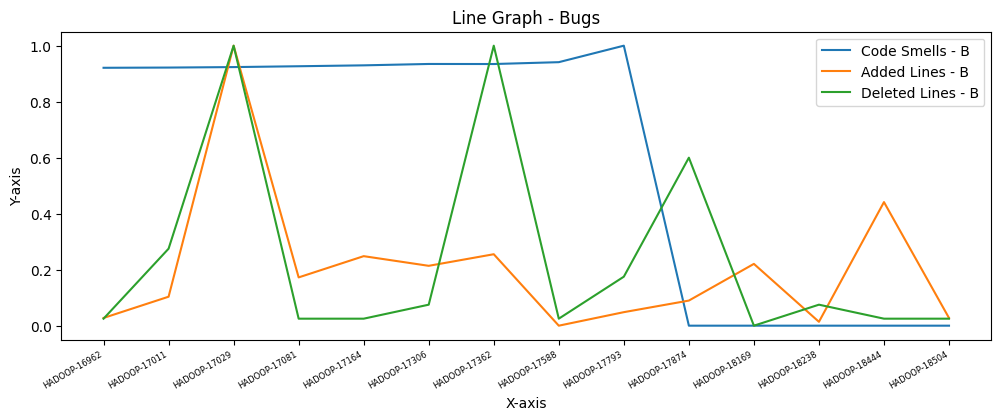

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter df_10th to only include issue type Bug and New Feature
#df_10th_feature = df_10th[df_10th['issue type'] == 'New Feature']
df_10th_bug = df_10th[df_10th['issue type'] == 'Bug']

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

#feature_code_Smells = min_max_scaling(df_10th_feature['code_smells'])
#feature_added_lines = min_max_scaling(df_10th_feature['added_lines'])
#feature_deleted_lines = min_max_scaling(df_10th_feature['deleted_lines'])
bug_code_Smells = min_max_scaling(df_10th_bug['code_smells'])
bug_added_lines = min_max_scaling(df_10th_bug['added_lines'])
bug_deleted_lines = min_max_scaling(df_10th_bug['deleted_lines'])


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
#ax.plot(df_10th_feature['jira issue key'], feature_code_Smells)
ax.plot(df_10th_bug['jira issue key'], bug_code_Smells)
#ax.plot(df_10th_feature['jira issue key'], feature_added_lines)
ax.plot(df_10th_bug['jira issue key'], bug_added_lines)
#ax.plot(df_10th_feature['jira issue key'], feature_deleted_lines)
ax.plot(df_10th_bug['jira issue key'], bug_deleted_lines)

# Add labels to lines
ax.legend(['Code Smells - B', 'Added Lines - B', 'Deleted Lines - B'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph - Bugs')

# Display the graph
plt.show()


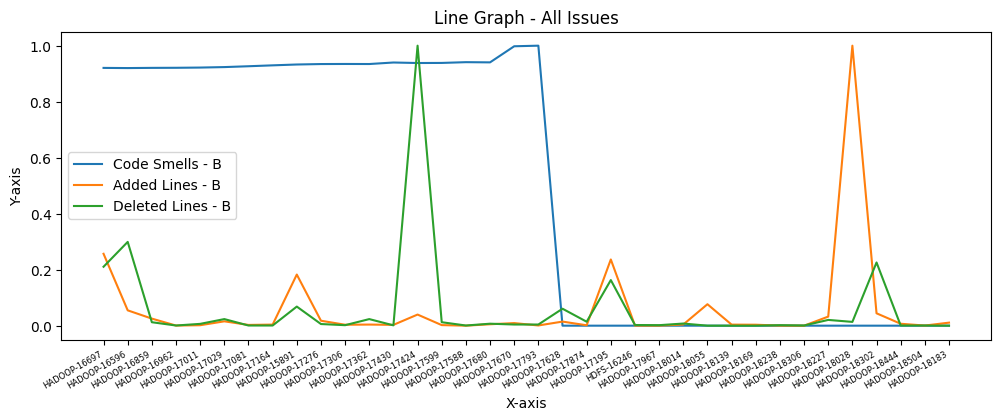

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter df_10th to only include issue type Bug and New Feature
#df_10th_feature = df_10th[df_10th['issue type'] == 'New Feature']
df_10th_bug = df_10th

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

#feature_code_Smells = min_max_scaling(df_10th_feature['code_smells'])
#feature_added_lines = min_max_scaling(df_10th_feature['added_lines'])
#feature_deleted_lines = min_max_scaling(df_10th_feature['deleted_lines'])
bug_code_Smells = min_max_scaling(df_10th_bug['code_smells'])
bug_added_lines = min_max_scaling(df_10th_bug['added_lines'])
bug_deleted_lines = min_max_scaling(df_10th_bug['deleted_lines'])


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
#ax.plot(df_10th_feature['jira issue key'], feature_code_Smells)
ax.plot(df_10th_bug['jira issue key'], bug_code_Smells)
#ax.plot(df_10th_feature['jira issue key'], feature_added_lines)
ax.plot(df_10th_bug['jira issue key'], bug_added_lines)
#ax.plot(df_10th_feature['jira issue key'], feature_deleted_lines)
ax.plot(df_10th_bug['jira issue key'], bug_deleted_lines)

# Add labels to lines
ax.legend(['Code Smells - B', 'Added Lines - B', 'Deleted Lines - B'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph - All Issues')

# Display the graph
plt.show()


In [128]:
df_10th.loc[df_10th['code_smells']!=0]

,hash,author,author_date,committer,committer_date,msg,parents,num_of_files,num_of_modified_java_files,added_lines,deleted_lines,nloc,jira issue key,summary,issue type,status,resolution,code_smells
0,49df83899543586bbcaf80f01399ade031cf68b0,Steve Loughran,2020-01-09 18:22:04+00:00,Steve Loughran,2020-01-10 11:11:56+00:00,HADOOP-16697. Tune/audit S3A authoritative mod...,['9da294a140a919d9ba648637d09340bccfd5edd6'],32.0,30.0,2393.0,358.0,13520.0,HADOOP-16697,audit/tune s3a authoritative flag in s3guard D...,Sub-task,Resolved,Fixed,9175
10,7dac7e1d13eaf0eac04fe805c7502dcecd597979,Vinayakumar B,2020-02-07 14:39:24+05:18,GitHub,2020-02-07 14:39:24+05:18,HADOOP-16596. [pb-upgrade] Use shaded protobuf...,['5944d28130925fe1452f545e96b5e44f064bc69e'],425.0,402.0,511.0,509.0,96834.0,HADOOP-16596,[pb-upgrade] Use shaded protobuf classes from ...,Sub-task,Resolved,Fixed,9169
20,42dfd270a11419adcb189e8f3a6ddb8f19358088,Sahil Takiar,2020-02-24 08:28:00-08:00,GitHub,2020-02-24 16:28:00+00:00,HADOOP-16859: ABFS: Add unbuffer support to AB...,['7f8685f4760f1358bb30927a7da9a5041e8c39e1'],5.0,4.0,236.0,21.0,494.0,HADOOP-16859,ABFS: Add unbuffer support to AbfsInputStream,Sub-task,Resolved,Fixed,9176
30,5746533cde0065761a68a9b3e89ee01da6c8eeeb,Ayush Saxena,2020-04-09 23:17:48+05:18,Ayush Saxena,2020-04-09 23:18:28+05:18,HADOOP-16962. Making `getBoolean` log warning ...,['061afcdf30ce10d04986672a0583d925d3f8f741'],1.0,1.0,5.0,1.0,2271.0,HADOOP-16962,Making `getBoolean` log warning message for un...,Bug,Resolved,Fixed,9179
40,263c76b678275dfff867415c71ba9dc00a9235ef,Mingliang Liu,2020-04-30 14:13:21-07:00,Mingliang Liu,2020-04-30 14:15:28-07:00,HADOOP-17011. Tolerate leading and trailing sp...,['6bdab3723eff78c79aa48c24aad87373b983fe6c'],9.0,9.0,16.0,11.0,4764.0,HADOOP-17011,Tolerate leading and trailing spaces in fs.def...,Bug,Resolved,Fixed,9187
50,e7dd02768b658b2a1f216fbedc65938d9b6ca6e9,Abhishek Das,2020-06-05 14:56:51-07:00,GitHub,2020-06-05 14:56:51-07:00,HADOOP-17029. Return correct permission and ow...,['76fa0222f0d2e2d92b4a1eedba8b3e38002e8c23'],3.0,3.0,146.0,40.0,2273.0,HADOOP-17029,ViewFS does not return correct user/group and ACL,Bug,Resolved,Fixed,9204
60,2f500e4635ea4347a55693b1a10a4a4465fe5fac,Madhusoodan Pataki,2020-07-06 20:43:42+05:18,GitHub,2020-07-06 16:25:42+01:00,HADOOP-17081. MetricsSystem doesn't start the ...,['639acb6d8921127cde3174a302f2e3d71b44f052'],2.0,2.0,26.0,1.0,1075.0,HADOOP-17081,MetricsSystem doesn't start the sink adapters ...,Bug,Resolved,Fixed,9234
70,2986058e7f6fa1b5aab259c64a745b2eedb2febe,sguggilam,2020-08-04 10:30:06-07:00,GitHub,2020-08-04 10:30:06-07:00,HADOOP-17164. UGI loginUserFromKeytab doesn't ...,['8fd4f5490f59a2e9e561b6438b30b3a7453c808b'],2.0,2.0,37.0,1.0,1886.0,HADOOP-17164,UGI loginUserFromKeytab doesn't set the last l...,Bug,Resolved,Fixed,9266
80,12a316cdf9994feaa36c3ff7d13e67d70398a9f3,zz,2020-09-10 21:20:32-07:00,GitHub,2020-09-10 21:20:32-07:00,HADOOP-15891. provide Regex Based Mount Point ...,['9960c01a25c6025e81559a8cf32e9f3cea70d2cc'],14.0,13.0,1702.0,116.0,2917.0,HADOOP-15891,Provide Regex Based Mount Point In Inode Tree,New Feature,Resolved,Fixed,9296
90,d0d10f7e8f998779ef11182c0f5c60fc8f729b39,Fei Hui,2020-10-04 01:02:28+08:00,GitHub,2020-10-04 02:02:28+09:00,HADOOP-17276. Extend CallerContext to make it ...,['18fa4397e6dc7663bcc7c7309126f45eb8d3fa17'],8.0,7.0,166.0,10.0,1957.0,HADOOP-17276,Extend CallerContext to make it include many i...,Improvement,Resolved,Fixed,9312


# Current

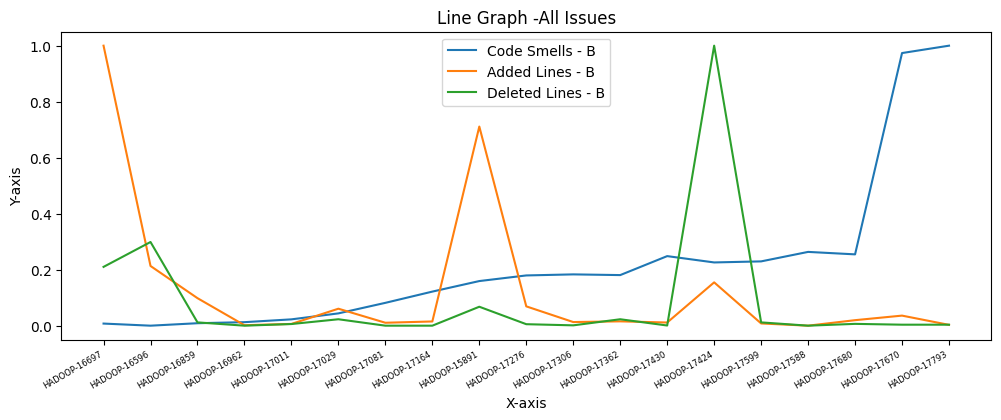

In [136]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter df_10th to only include issue type Bug and New Feature
#df_10th_feature = df_10th[df_10th['issue type'] == 'New Feature']
df_10th_bug = df_10th.loc[df_10th['code_smells']!=0]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

#feature_code_Smells = min_max_scaling(df_10th_feature['code_smells'])
#feature_added_lines = min_max_scaling(df_10th_feature['added_lines'])
#feature_deleted_lines = min_max_scaling(df_10th_feature['deleted_lines'])
bug_code_Smells = min_max_scaling(df_10th_bug['code_smells'])
bug_added_lines = min_max_scaling(df_10th_bug['added_lines'])
bug_deleted_lines = min_max_scaling(df_10th_bug['deleted_lines'])


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
#ax.plot(df_10th_feature['jira issue key'], feature_code_Smells)
ax.plot(df_10th_bug['jira issue key'], bug_code_Smells)
#ax.plot(df_10th_feature['jira issue key'], feature_added_lines)
ax.plot(df_10th_bug['jira issue key'], bug_added_lines)
#ax.plot(df_10th_feature['jira issue key'], feature_deleted_lines)
ax.plot(df_10th_bug['jira issue key'], bug_deleted_lines)

# Add labels to lines
ax.legend(['Code Smells - B', 'Added Lines - B', 'Deleted Lines - B'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph -All Issues')

# Display the graph
plt.show()


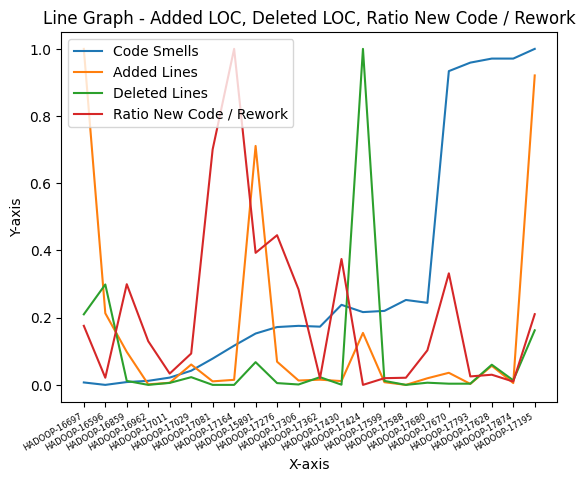

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter df_10th to only include issue type Bug and New Feature
#df_10th_feature = df_10th[df_10th['issue type'] == 'New Feature']
df_10th_all = df_10th.loc[df_10th['code_smells']!=0]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

#feature_code_Smells = min_max_scaling(df_10th_feature['code_smells'])
#feature_added_lines = min_max_scaling(df_10th_feature['added_lines'])
#feature_deleted_lines = min_max_scaling(df_10th_feature['deleted_lines'])
all_code_Smells = min_max_scaling(df_10th_all['code_smells'])
all_added_lines = min_max_scaling(df_10th_all['added_lines'])
all_deleted_lines = min_max_scaling(df_10th_all['deleted_lines'])
# Heuristic New Code = Added - Deleted, Rework = Deleted
all_new_code_divided_rework_lines = min_max_scaling((df_10th_all['added_lines'] - df_10th_all['deleted_lines']) / df_10th_all['deleted_lines'])


# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph
#ax.plot(df_10th_feature['jira issue key'], feature_code_Smells)
ax.plot(df_10th_all['jira issue key'], all_code_Smells)
#ax.plot(df_10th_feature['jira issue key'], feature_added_lines)
ax.plot(df_10th_all['jira issue key'], all_added_lines)
#ax.plot(df_10th_feature['jira issue key'], feature_deleted_lines)
ax.plot(df_10th_all['jira issue key'], all_deleted_lines)

ax.plot(df_10th_all['jira issue key'], all_new_code_divided_rework_lines)


# Add labels to lines
ax.legend(['Code Smells', 'Added Lines', 'Deleted Lines', 'Ratio New Code / Rework'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph - Added LOC, Deleted LOC, Ratio New Code / Rework')

# Display the graph
plt.show()


In [132]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and its p-value
corr1, p1 = pearsonr(bug_code_Smells, bug_new_code_divided_rework_lines)

# Print the results
print(f'Pearson correlation coefficient between code smells and added lines: {corr1:.2f}, p-value: {p1:.2f}')

Pearson correlation coefficient between code smells and added lines: -0.09, p-value: 0.72


In [10]:

import requests
import csv
from requests.auth import HTTPBasicAuth
#import jason

# Step 1: Get the API endpoint for issues
issues_api_endpoint = "http://localhost:9000/api/measures/search_history"

# Step 2: Query the API
parameters = {
    "component": "apache_hadoop_common_sq_analysis",
    "metrics": "code_smells",
    # 'token': 'squ_c6150ca004538957f8fd04dcea71df1ae8e63c75'
}
response = requests.get(issues_api_endpoint, auth=HTTPBasicAuth("admin", "admin_j"), params=parameters)

# Step 3: Parse the response
import json
json_data = json.loads(response.text)
json_data.keys()

#response.text
#'{"paging":{"pageIndex":1,"pageSize":100,"total":20},"measures":[{"metric":"code_smells","history":[{"date":"2023-02-16T21:11:52+1300","value":"10121"},{"date":"2023-02-17T00:05:08+1300","value":"9945"},{"date":"2023-02-17T00:10:54+1300","value":"9966"},{"date":"2023-02-17T00:16:43+1300","value":"9976"},

#sq_measures = json_data['measures']
for i in range(len(json_data["measures"][0]["history"])):
    print (json_data["measures"][0]["history"][i]["date"], json_data["measures"][0]["history"][i]["value"])
#json_data["measures"][0]["history"][0]["date"], json_data["measures"][0]["history"][0]["value"]

#sq_issues[0].keys()



2023-02-17T07:38:22+1300 9175
2023-02-17T07:48:11+1300 9169
2023-02-17T07:57:11+1300 9176
2023-02-17T08:05:40+1300 9179
2023-02-17T08:14:13+1300 9187
2023-02-17T08:22:49+1300 9204
2023-02-17T08:31:25+1300 9234
2023-02-17T08:40:07+1300 9266
2023-02-17T08:48:46+1300 9296
2023-02-17T08:57:30+1300 9312
2023-02-17T09:06:16+1300 9315
2023-02-17T09:15:10+1300 9313
2023-02-17T09:51:24+1300 9367
2023-02-17T10:02:35+1300 9349
2023-02-17T10:12:30+1300 9352
2023-02-17T10:23:33+1300 9379
2023-02-17T10:35:34+1300 9372
2023-02-17T10:46:27+1300 9945
2023-02-17T10:58:02+1300 9966
2023-02-17T11:10:02+1300 9976
2023-02-17T11:22:12+1300 9976
2023-02-17T11:34:05+1300 10000


In [15]:
#including code smells

import pandas as pd
new_data_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_with_jira.csv')
new_main_rows = new_data_df[new_data_df['hash'].notna()]
new_main_rows['code_smells'] = 0
for i, row in new_main_rows.iterrows():
    if i % 10 != 0:
        continue
    #json_data["measures"][0]["history"][i]["value"]
    new_main_rows.at[i,'code_smells'] = int(json_data["measures"][0]["history"][int(i/10)]["value"])
    print(i, new_main_rows['code_smells'][i])

    
#write to csv
new_main_rows.to_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_and_sq_code_smells.csv', index=False)

0 9175
10 9169
20 9176
30 9179
40 9187
50 9204
60 9234
70 9266
80 9296
90 9312
100 9315
110 9313
120 9367
130 9349
140 9352
150 9379
160 9372
170 9945
180 9966
190 9976
200 9976
210 10000


IndexError: list index out of range

# SonarQube Code Smells

In [25]:
#including code smells and code smells diff

import pandas as pd
new_data_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_with_jira.csv')
new_main_rows = new_data_df[new_data_df['hash'].notna()]
#code smells
new_main_rows['code_smells'] = 0
#code smell diff
new_main_rows['code_smells_diff'] = 0
for i, row in new_main_rows.iterrows():
    if i % 10 != 0:
        continue
    if int(i/10) < len(json_data["measures"][0]["history"]):
        #code smells
        new_main_rows.at[i,'code_smells'] = int(json_data["measures"][0]["history"][int(i/10)]["value"])
        #code smells diff
        if i != 0:  
            new_main_rows.at[i,'code_smells_diff'] = new_main_rows.at[i,'code_smells'] - int(json_data["measures"][0]["history"][int(i/10)-1]["value"])

        print (i, new_main_rows['code_smells'][i], new_main_rows['code_smells_diff'][i])
        
    elif int(i / 10) >= len(json_data["measures"][0]["history"]):
        break

#write to csv
new_main_rows.to_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_and_sq_code_smells.csv', index=False)

0 9175 0
10 9169 -6
20 9176 7
30 9179 3
40 9187 8
50 9204 17
60 9234 30
70 9266 32
80 9296 30
90 9312 16
100 9315 3
110 9313 -2
120 9367 54
130 9349 -18
140 9352 3
150 9379 27
160 9372 -7
170 9945 573
180 9966 21
190 9976 10
200 9976 0
210 10000 24


# Line Graph: SonarQube Code Smells Vs New Code and Rework

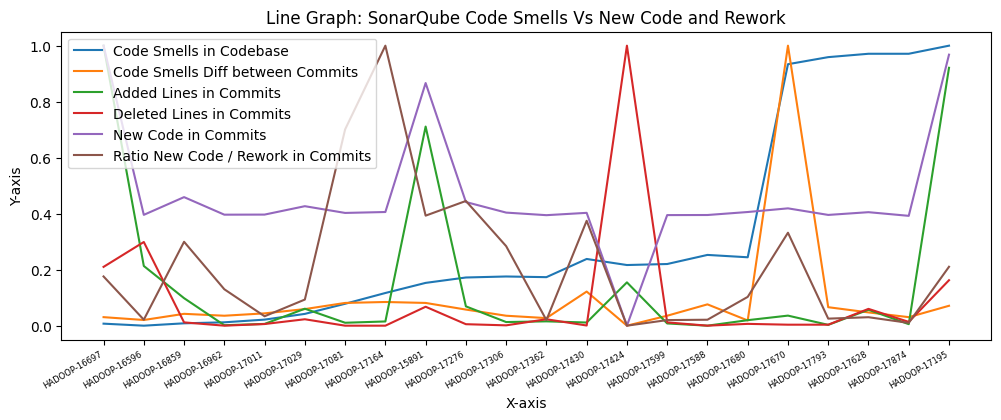

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 4]

#read csv
sq_code_smells_df = pd.read_csv('c:\\CodeBook\\new_code_rework_TD\\sample_main_rows_with_aggregated_data_and_sq_code_smells.csv')

# Filter rows for 10th commit
df_code_smells_10th = sq_code_smells_df.loc[sq_code_smells_df['code_smells']!=0]

# Define the min-max scaling function
def min_max_scaling(values):
    min_value = values.min()
    max_value = values.max()
    scaled_values = (values - min_value) / (max_value - min_value)
    return scaled_values

# Scale the values
code_smells_diff = min_max_scaling(df_code_smells_10th['code_smells_diff'])
code_smells = min_max_scaling(df_code_smells_10th['code_smells'])
added_lines = min_max_scaling(df_code_smells_10th['added_lines'])
deleted_lines = min_max_scaling(df_code_smells_10th['deleted_lines'])

# Heuristics: New Code = Added - Deleted, Rework = Deleted.
new_code = min_max_scaling(df_code_smells_10th['added_lines'] - df_code_smells_10th['deleted_lines'])
new_code_divided_by_rework = (df_code_smells_10th['added_lines'] - df_code_smells_10th['deleted_lines']) / df_code_smells_10th['deleted_lines']
scaled_new_code_divided_by_rework = min_max_scaling(new_code_divided_by_rework)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line graph

ax.plot(df_code_smells_10th['jira issue key'], code_smells)
ax.plot(df_code_smells_10th['jira issue key'], code_smells_diff)
ax.plot(df_code_smells_10th['jira issue key'], added_lines)
ax.plot(df_code_smells_10th['jira issue key'], deleted_lines)
ax.plot(df_code_smells_10th['jira issue key'], new_code)
ax.plot(df_code_smells_10th['jira issue key'], scaled_new_code_divided_by_rework)

# Add labels to lines
ax.legend(['Code Smells in Codebase', 'Code Smells Diff between Commits', 'Added Lines in Commits', 'Deleted Lines in Commits', 'New Code in Commits', 'Ratio New Code / Rework in Commits'])

# Make x-axis labels readable
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# Make x-axis text smaller
plt.setp(ax.get_xticklabels(), fontsize=6)

# Add axis labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Graph: SonarQube Code Smells Vs New Code and Rework')

# Display the graph
plt.show()


# Statistical Tests

## Pearson Correlation: SonarQube Code Smells Vs New Code and Rework

In [30]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and its p-value
corr1, p1 = pearsonr(code_smells, added_lines)
corr2, p2 = pearsonr(code_smells, deleted_lines)
corr3, p3 = pearsonr(code_smells, new_code)
corr4, p4 = pearsonr(code_smells, scaled_new_code_divided_by_rework)

#repeat above for code_smell_diffs
corr5, p5 = pearsonr(code_smells_diff, added_lines)
corr6, p6 = pearsonr(code_smells_diff, deleted_lines)
corr7, p7 = pearsonr(code_smells_diff, new_code)
corr8, p8 = pearsonr(code_smells_diff, scaled_new_code_divided_by_rework)

# Print the results
print(f'Pearson correlation coefficient between code smells and added lines: {corr1:.2f}, p-value: {p1:.2f}')
print(f'Pearson correlation coefficient between code smells and deleted lines: {corr2:.2f}, p-value: {p2:.2f}')
print(f'Pearson correlation coefficient between code smells and new code: {corr3:.2f}, p-value: {p3:.2f}')
print(f'Pearson correlation coefficient between code smells and new code / rework: {corr4:.2f}, p-value: {p4:.2f}')

print(f'Pearson correlation coefficient between code smells diff and added lines: {corr5:.2f}, p-value: {p5:.2f}')
print(f'Pearson correlation coefficient between code smells diff and deleted lines: {corr6:.2f}, p-value: {p6:.2f}')
print(f'Pearson correlation coefficient between code smells diff and new code: {corr7:.2f}, p-value: {p7:.2f}')
print(f'Pearson correlation coefficient between code smells diff and new code / rework: {corr8:.2f}, p-value: {p8:.2f}')


Pearson correlation coefficient between code smells and added lines: 0.05, p-value: 0.83
Pearson correlation coefficient between code smells and deleted lines: -0.07, p-value: 0.75
Pearson correlation coefficient between code smells and new code: 0.09, p-value: 0.71
Pearson correlation coefficient between code smells and new code / rework: -0.21, p-value: 0.35
Pearson correlation coefficient between code smells diff and added lines: -0.08, p-value: 0.71
Pearson correlation coefficient between code smells diff and deleted lines: -0.15, p-value: 0.51
Pearson correlation coefficient between code smells diff and new code: -0.01, p-value: 0.98
Pearson correlation coefficient between code smells diff and new code / rework: 0.18, p-value: 0.42


The Pearson correlation coefficient measures the linear relationship between two variables, where a value of 0 indicates no correlation, a positive value indicates a positive correlation, and a negative value indicates a negative correlation. The p-value is a measure of the strength of evidence against the null hypothesis that there is no correlation between the two variables. A small p-value (typically less than 0.05) indicates strong evidence against the null hypothesis, while a large p-value indicates weak evidence against the null hypothesis.

Based on the results, Chat GPT says:

* The Pearson correlation coefficient between code smells and added lines is 0.05, which indicates a very weak positive correlation. The p-value is 0.83, which indicates weak evidence against the null hypothesis of no correlation.

* The Pearson correlation coefficient between code smells and deleted lines is -0.07, which indicates a very weak negative correlation. The p-value is 0.75, which indicates weak evidence against the null hypothesis of no correlation.

* The Pearson correlation coefficient between code smells and new code is 0.09, which indicates a very weak positive correlation. The p-value is 0.71, which indicates weak evidence against the null hypothesis of no correlation.

* The Pearson correlation coefficient between code smells and new code / rework is -0.21, which indicates a weak negative correlation. The p-value is 0.35, which indicates weak evidence against the null hypothesis of no correlation.

* The Pearson correlation coefficient between code smells diff and added lines is -0.08, which indicates a very weak negative correlation. The p-value is 0.71, which indicates weak evidence against the null hypothesis of no correlation.

* The Pearson correlation coefficient between code smells diff and deleted lines is -0.15, which indicates a weak negative correlation. The p-value is 0.51, which indicates weak evidence against the null hypothesis of no correlation.

* The Pearson correlation coefficient between code smells diff and new code is -0.01, which indicates no correlation. The p-value is 0.98, which indicates strong evidence against the alternative hypothesis of correlation.

* The Pearson correlation coefficient between code smells diff and new code / rework is 0.18, which indicates a weak positive correlation. The p-value is 0.42, which indicates weak evidence against the null hypothesis of no correlation.

Overall, the results suggest that there is weak to no correlation between code smells and the number of added lines, deleted lines, and new code. However, there may be a weak negative correlation between code smells and new code / rework. It is important to note that correlation does not imply causation, and further analysis is required to establish any causal relationship between these variables.

Summary:

| Variable | Code Smells | Code Smells Diff |
| --- | --- | --- |
| Added Lines | 0.05, p=0.83 (very weak positive correlation) | -0.08, p=0.71 (very weak negative correlation) |
| Deleted Lines | -0.07, p=0.75 (very weak negative correlation) | -0.15, p=0.51 (weak negative correlation) |
| New Code | 0.09, p=0.71 (very weak positive correlation) | -0.01, p=0.98 (no correlation) |
| New Code / Rework | -0.21, p=0.35 (weak negative correlation) | 0.18, p=0.42 (weak positive correlation) |
